In [1]:
from netgen.csg import *
from ngsolve import *
from ngsolve.webgui import Draw
# from netgen import gui
from ngsolve.comp import ConvertOperator
import numpy as np

import time
import pickle

# import sys
# # insert at position 1 in the path, as 0 is the path of this file.
# sys.path.insert(1, '..')
# from reduced_basis import *

Geometrie: Spule mit Luftspalt und Stahlplatte dazwischen

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008-17-g2ebed44be', 'mesh_dim': 3, 'order2d': 2, 'order3d': 2,…

Text(0, 0.5, 'Magnetic Flux Density B in T')

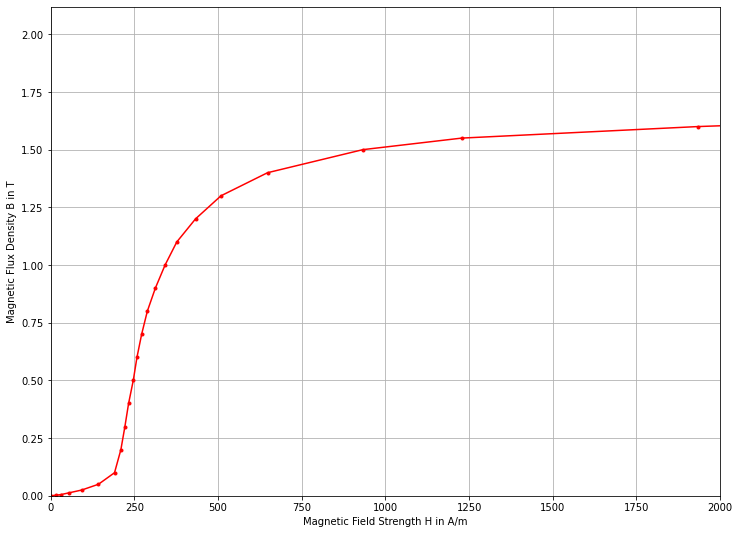

In [2]:
geo = CSGeometry()
box_size = 2
box = OrthoBrick(Pnt(-box_size,-box_size,-box_size), Pnt(box_size,box_size,box_size)).bc("outer")

lx = 0.4
lz = 0.5
d = 0.1
lp = 0.3
core = OrthoBrick(Pnt(-lx,-d/2,-lz),Pnt(lx,d/2,lz))- \
           OrthoBrick(Pnt(d-lx,-d,-lz+d),Pnt(lx-d,d,lz-d))- \
           OrthoBrick(Pnt(d,-d,-d/2),Pnt(lx+d,d,d/2)).maxh(0.2).mat('core')

plate = OrthoBrick(Pnt(d/2,-lp,-d/4),Pnt(2*lx-d,lp,d/4)).maxh(0.05).mat('plate')


coil = (Cylinder(Pnt(-lx+d/2,0,0), Pnt(-lx+d/2,0,1), 3*d) - \
        Cylinder(Pnt(-lx+d/2,0,0), Pnt(-lx+d/2,0,1), d)) * \
        OrthoBrick (Pnt(-1,-1,-lz+2*d),Pnt(1,1,lz-2*d)).maxh(0.2).mat('coil')

air = (box - coil - plate -core).mat('air') 

geo.Add(plate)
geo.Add(core)
geo.Add(coil)
geo.Add(air, transparent=True)

mesh = Mesh(geo.GenerateMesh(maxh=0.5))
mesh.Curve(3)
Draw (mesh)


from matplotlib import pyplot as plt

H_KL = [ -4.47197834e-13, 1.60000000e+01, 3.00000000e+01, 5.40000000e+01\
, 9.30000000e+01, 1.43000000e+02, 1.91000000e+02, 2.10000000e+02 \
, 2.22000000e+02, 2.33000000e+02, 2.47000000e+02, 2.58000000e+02\
, 2.72000000e+02, 2.89000000e+02, 3.13000000e+02, 3.42000000e+02\
, 3.77000000e+02, 4.33000000e+02, 5.09000000e+02, 6.48000000e+02\
, 9.33000000e+02, 1.22800000e+03, 1.93400000e+03, 2.91300000e+03\
, 4.99300000e+03, 7.18900000e+03, 9.42300000e+03, 9.42300000e+03\
, 1.28203768e+04, 1.65447489e+04, 2.07163957e+04, 2.55500961e+04\
, 3.15206135e+04, 4.03204637e+04, 7.73038295e+04, 1.29272791e+05\
, 1.81241752e+05, 2.33210713e+05, 2.85179674e+05, 3.37148635e+05\
, 3.89117596e+05, 4.41086557e+05, 4.93055518e+05, 5.45024479e+05\
, 5.96993440e+05, 6.48962401e+05, 7.00931362e+05, 7.52900323e+05\
, 8.04869284e+05, 8.56838245e+05, 9.08807206e+05, 9.60776167e+05\
, 1.01274513e+06, 1.06471409e+06, 1.11668305e+06, 1.16865201e+06\
, 1.22062097e+06, 1.27258993e+06, 1.32455889e+06, 1.37652785e+06\
, 1.42849682e+06, 1.48046578e+06, 1.53243474e+06, 1.58440370e+06\
, 1.63637266e+06, 1.68834162e+06, 1.74031058e+06, 1.79227954e+06\
, 1.84424850e+06, 1.89621746e+06, 1.94818643e+06, 2.00015539e+06\
, 2.05212435e+06, 2.10409331e+06, 2.15606227e+06, 2.20803123e+06\
, 2.26000019e+06]

B_KL = [ 0.00000000e+00, 2.50000000e-03, 5.00000000e-03, 1.25000000e-02\
, 2.50000000e-02, 5.00000000e-02, 1.00000000e-01, 2.00000000e-01\
, 3.00000000e-01, 4.00000000e-01, 5.00000000e-01, 6.00000000e-01\
, 7.00000000e-01, 8.00000000e-01, 9.00000000e-01, 1.00000000e+00\
, 1.10000000e+00, 1.20000000e+00, 1.30000000e+00, 1.40000000e+00\
, 1.50000000e+00, 1.55000000e+00, 1.60000000e+00, 1.65000000e+00\
, 1.70000000e+00, 1.75000000e+00, 1.80000000e+00, 1.80000000e+00\
, 1.86530612e+00, 1.93061224e+00, 1.99591837e+00, 2.06122449e+00\
, 2.12653061e+00, 2.19183673e+00, 2.25714286e+00, 2.32244898e+00\
, 2.38775510e+00, 2.45306122e+00, 2.51836735e+00, 2.58367347e+00\
, 2.64897959e+00, 2.71428571e+00, 2.77959184e+00, 2.84489796e+00\
, 2.91020408e+00, 2.97551020e+00, 3.04081633e+00, 3.10612245e+00\
, 3.17142857e+00, 3.23673469e+00, 3.30204082e+00, 3.36734694e+00\
, 3.43265306e+00, 3.49795918e+00, 3.56326531e+00, 3.62857143e+00\
, 3.69387755e+00, 3.75918367e+00, 3.82448980e+00, 3.88979592e+00\
, 3.95510204e+00, 4.02040816e+00, 4.08571429e+00, 4.15102041e+00\
, 4.21632653e+00, 4.28163265e+00, 4.34693878e+00, 4.41224490e+00\
, 4.47755102e+00, 4.54285714e+00, 4.60816327e+00, 4.67346939e+00\
, 4.73877551e+00, 4.80408163e+00, 4.86938776e+00, 4.93469388e+00\
, 5.00000000e+00]
bh_curve = BSpline (2, [0]+list(B_KL), list(H_KL)) # [0] + is needed!
energy_dens = bh_curve.Integrate()
# help(energy_dens.Integrate())
# print(energy_dens) # wie plotten


plt.figure(1, figsize=[12, 9])
plt.clf()
plt.plot(H_KL, B_KL, '.-r')
plt.xlim(0, 2000)
plt.ylim(0, 2.12)
plt.grid()
plt.xlabel("Magnetic Field Strength H in A/m")
plt.ylabel("Magnetic Flux Density B in T")

$$
\DeclareMathOperator{\Grad}{grad}
\DeclareMathOperator{\Curl}{curl}
\DeclareMathOperator{\Div}{div}
\DeclareMathOperator{\R}{\mathbb{R}}
\DeclareMathOperator{\real}{real}
\DeclareMathOperator{\reg}{reg}
$$
### Magnetostatisches Problem ohne Stahlplatte

Finde $ u \in H(\Curl)$ sodass 
$$
\int \mu^{-1} \Curl u \Curl v + \reg \int  u  v= \int j v \qquad  \forall \, v \in H(\Curl) \tag{1}
$$

Wir nehmen zunächst an, dass der `core` aus einem tollen Material besteht das immer eine hohe, lineare Permeabilität hat. Um in den nichtlinearen Bereich des Stahls zu kommen wollen wir ein Magnetfeld zwischen 1.0 und 1.5 Tesla im Lufspalt. 

In folgender Rechnung wird vernachlässigt, dass der Luftspalt (bzw dann die zwei Luftspalte) kleiner ist wenn sich eine Stahlplatte darin befindet, daher ist das Ziel ohne Stahlplatte auf ca 1T zu kommen. Außerdem wird angenommen dass es keine Streuflüsse gibt. 

Es gilt für das Magnetfeld im Luftspalt $B_l$ gilt $B = \frac{\Phi}{A}$ Wobei $\Phi$ die magnetische Flussdichte und $A$ die Querschnittsfläche des Luftspalts ist. Die von der Spule erzeugte Durchflutung $\Theta$ beträgt $4d(l_z-d)*j$, falls die Stromdichte $j$ konstant ist.  Wenn wir die im Kern abfallende magnetische Spannung vernachlässigen gilt wegen $\Theta = R\Phi$ und des magnetische Widerstands im Luftspalt $R = \frac{d}{\mu_0A}$ dass    

$$ 
4d(l_z-d)j = \Theta = \frac{d}{\mu_0A}\Phi = \frac{d}{\mu_0}B.
$$

Die Stromdichte ergibt sich also ungefähr als 
$$
 j \approx \frac{B}{4\mu_0(l_z-d) } \approx 5\cdot10^5.
$$

Es stellt sich heraus, dass $j \approx 7\cdot10^5$ zum gewünschten einen Tesla führt. 


### Harmonische Magnetisierung

Sei $j(x,t) = j(x)\cos(\omega t)$. Dann lautet das Problem


Finde $ u \in C(\R^+; H(\Curl))$ sodass 
$$
\int \frac{1}{\mu(|\Curl u|)}\Curl u \Curl v + \reg \int_{\Omega\setminus \text{plate}} u v -\int j v = \sigma \int_{\text{plate}} \partial_t u v   \qquad  \forall \, v \in H(\Curl) \tag{2}
$$

Mit dem Funktional 


$$
F(u) := \int_{\text{plate}} \omega(|\Curl u|) + \reg \int \frac{1}{2} u^2  - \int ju  
$$

ist das äquivalent zu: Finde ein $u\in H(\Curl)$ sodass 
$$
\partial_v F(u) := \lim_{\epsilon \rightarrow 0} \frac{d}{d\epsilon} F(u+\epsilon v) = -\sigma \int_{\text{plate}} \partial_t u v \qquad \forall v \in H(\Curl)
$$

Impliziter Euler:
$$
\partial_v F(u^{n+1}) = -\sigma \int_{\text{plate}} \frac{u^{n+1} - u^{n}}{\Delta t}v \qquad \forall v \in H(\Curl) \tag{3}
$$

Die Lösung dieser Gleichung ist äquivalent zur Minimierung des Funktionals 

$$
G(u) = F(u)+\frac{\sigma}{2\Delta t }\int_{\text{plate}} (u-u^n)^2
$$

wobei $u^{n+1} := u$.


### Reduced Basis

Schreibweisen:
* $n$ ...  Zeit
* $N$ ... Anzahl snapshots
* $\{\zeta_1, .., \zeta_N\}$ ... Reduced Basis
* $\alpha_i$ ...  Koeffizienten

Achtung: Einstein!

Damit $u^n = \alpha_i^n\zeta_i$. 

Rechte Seite von (3):

$$
 -\alpha_i^{n+1}\frac{\sigma}{\Delta t} \int_{\text{plate}} \zeta_i\zeta_k +\alpha_i^{n}\frac{\sigma}{\Delta t} \int_{\text{plate}} \zeta_i\zeta_k
$$

Linke Seite von (3):

$$
\int \frac{1}{\mu(|\alpha_i^{n+1} \Curl \zeta_i|)}\alpha_i^{n+1} \Curl  \zeta_i \Curl \zeta_k + \reg \alpha_i^{n+1} \int_{\Omega\setminus \text{plate}} \zeta_i \zeta_k -\int j \zeta_k
$$

In [3]:
mv = MultiVector(3, 2, True)
npmv = np.ones((len(mv[0]), len(mv)), dtype=complex)
for j in range(len(mv)):
    npmv[:,j] = mv[j].FV().NumPy()
    
print(npmv)
import pickle
outputFile = 'test.data'
fw = open(outputFile, 'wb')
pickle.dump(npmv, fw)
fw.close()

inputFile = 'test.data'
fd = open(inputFile, 'rb')
dataset = pickle.load(fd)
print (type(dataset))

[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
<class 'numpy.ndarray'>


In [4]:
fes = HCurl(mesh, order = 3, dirichlet="outer", nograds=True)
u = fes.TrialFunction()
from math import pi

mu0 = 4*pi*1e-7
mur = { "core" : 1e10, "coil" : 1, "air" : 1}
sigma = {'plate': 8.6*1e6}
omega = 2*np.pi*30 # angular frequency
dt = 5e-2


t = Parameter(1)
j = CoefficientFunction((-y,lx-d/2+x,0))*CoefficientFunction(-1/sqrt(y**2+(lx-d/2+x)**2)*cos(t*omega)*1e5)

gfu = GridFunction(fes)
gfu_old = GridFunction(fes)

a = BilinearForm(fes)
for mat in mur.keys():
    a += Variation( 1/(2*mu0*mur[mat])*curl(u)*curl(u)*dx(mat) + 1e-6*1/(2*mu0*mur[mat])*u*u*dx(mat))
a += Variation(energy_dens(sqrt(1e-12+ curl(u)*curl(u))) * dx('plate'))
a += Variation(sigma['plate']/(2*dt)*(u-gfu_old)**2*dx('plate'))
a += Variation(j*u*dx('coil'))
    
## TODO: hier Abwandlung des preconditioning Beispiels
c = Preconditioner(a, "bddc")

In [6]:
import logging
from datetime import datetime

date = datetime.now().strftime("%d-%b-%Y (%H:%M:%S)")
logging.basicConfig(filename='output/nonlinear_{}.log'.format(date),level=logging.DEBUG)

TOL = 1e-8
MAX_IT = 30
MAX_STEPS = int(0.5/dt)
pnt = mesh(lx-d/2, 0, 0)

logging.info("""
TOL = {}
MAX_IT = {}
MAX_STEPS = {}
dt = {}
eval point = {}
angluar frequency = {}
""".format(TOL, MAX_IT, MAX_STEPS, dt, (lx-d/2, 0, 0), omega))


values = [None]*int(1/dt)
# achtung [np.zeros(MAX_STEPS)]*3 geht nicht weil Referenz auf gleiches Objekt
plot_data = {'B': [np.zeros(MAX_STEPS) for _ in range(3)], 
             'A': [np.zeros(MAX_STEPS) for _ in range(3)],
             'E': [np.zeros(MAX_STEPS) for _ in range(3)]} 

mv = None

with TaskManager():

    res = gfu.vec.CreateVector()
    w = gfu.vec.CreateVector()
    tmp = gfu.vec.CreateVector()
    
#     gfu.Set((sin(x),0,0)) # betragsmäßig zu große Anfangsdaten sind ein Problem!
    gfu.vec[:] = 0
    
    for step in range(MAX_STEPS):
        print("\nImplicit Euler Iteration: {}\n".format(step))
        logging.info("\nImplicit Euler Iteration: {}\n".format(step))
        
        
        gfu_old.vec.data = gfu.vec

    
        ####### begin solve problem

        err = 1
        it = 0

        while err > TOL and it < MAX_IT:
            it += 1

            e_old = a.Energy(gfu.vec)

            a.Apply(gfu.vec, res)

            a.AssembleLinearization(gfu.vec)
            
            solvers.CG(sol=w, rhs=res, mat=a.mat, pre=c.mat, printrates=False)

            err = abs(InnerProduct(w, res))

            print(" error {} in newton iteration {}".format(err, it))
            logging.info(" error {} in newton iteration {}".format(err, it))

            tmp.data = gfu.vec - w

            e_new = a.Energy(tmp)
#             print(" old energy: {}, new energy: {}".format(e_old, e_new))

            tau = 1
            cnt = 1
            while e_new > e_old:
                tau *= max(0.1, 1-0.1*cnt)
                cnt += 1
                tmp.data = gfu.vec - tau*w
                e_new = a.Energy(tmp)
#                 print(" new energy: {} with tau: {}".format( e_new, tau))

            gfu.vec.data = tmp

        index = int(step % (1/dt))
        if (values[index]):
            print("B({}): {}\nB({}-1): {}".format(step*dt, values[index], step*dt, curl(gfu)(pnt)))
            logging.info("B({}): {}\nB({}-1): {}".format(step*dt, values[index], step*dt, curl(gfu)(pnt)))

        else:
            print("B({}): {}".format(step*dt, curl(gfu)(pnt)))
            logging.info("B({}): {}".format(step*dt, curl(gfu)(pnt)))

        values[index] = curl(gfu)(pnt)
        
        for i in range(3):
            plot_data['B'][i][step] = curl(gfu)(pnt)[i]
            plot_data['A'][i][step] = gfu(pnt)[i]
            plot_data['E'][i][step] = ((gfu-gfu_old)/dt)(pnt)[i]

        ####### end solve problem
    
        t.Set(t.Get()+dt)
        
        if mv is None:
            mv = MultiVector(gfu.vec, 1)
        else:
            mv.AppendOrthogonalize(gfu.vec)

def show():
    Draw (curl(gfu), mesh, "B-field", draw_surf=False)
    Draw ((gfu-gfu_old)/dt, mesh, "E-field", draw_surf=False)
    mip = mesh(lx-d/2, 0, 0)
    print(curl(gfu)(mip), np.linalg.norm(curl(gfu)(mip)))
    



Implicit Euler Iteration: 0

 error 352.8181219446791 in newton iteration 1
 error 4.541289927237438 in newton iteration 2
 error 0.41049857627749936 in newton iteration 3
 error 0.04142254964153111 in newton iteration 4
 error 0.011665142854050441 in newton iteration 5
 error 0.0005846569538370966 in newton iteration 6
 error 3.052610759657294e-05 in newton iteration 7
 error 4.778360960567965e-07 in newton iteration 8
 error 6.897025273215461e-12 in newton iteration 9
B(0.0): (-0.0014566474609323575, 0.0402539262725404, 0.023169201016717305)

Implicit Euler Iteration: 1

 error 1410.3451729563817 in newton iteration 1
 error 0.7294197253593471 in newton iteration 2
 error 0.3132440453422045 in newton iteration 3
 error 0.0154059484603635 in newton iteration 4
 error 0.003160061142654366 in newton iteration 5
 error 7.859002390813967e-05 in newton iteration 6
 error 8.435654449084483e-08 in newton iteration 7
 error 1.3499369644258856e-13 in newton iteration 8
B(0.05): (0.00167569457

In [8]:
# save data
npmv = np.zeros((len(mv[0]), len(mv)), dtype=complex)
for j in range(len(mv)):
    npmv[:,j] = mv[j].FV().NumPy()
    
outputFile = 'output/mv_{}.data'.format(date)
fw = open(outputFile, 'wb')
pickle.dump(npmv, fw)
fw.close()

# inputFile = 'test.data'
# fd = open(inputFile, 'rb')
# dataset = pickle.load(fd)
# print (type(dataset))

<IPython.core.display.Javascript object>


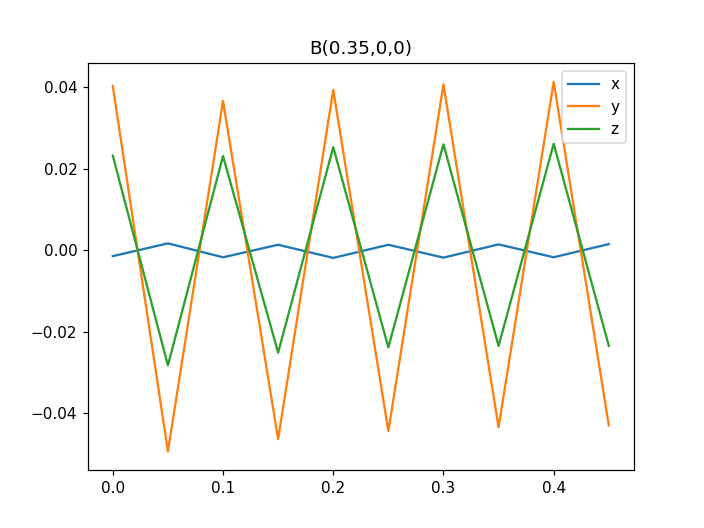

In [9]:
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure()
axis = plt.axes()

x_val = np.arange(0, MAX_STEPS*dt, dt)
plt.plot(x_val, plot_data['B'][0], label='x')
plt.plot(x_val, plot_data['B'][1], label='y')
plt.plot(x_val, plot_data['B'][2], label='z')
plt.title("B(0.35,0,0)")
plt.legend()